In [1]:
NAME = "Does Political Freedom translate to more Welfare Spending?"
COLLABORATORS = "Pranav Yadav"

|Name|SNR|ANR|
|----|---|----|
|Pranav Yadav|2055862|u617883|

## I. Research Question

**Does Political Freedom translate to more Welfare Spending?**

Using the political index provided by Varities of Democracy dataset, and the social welfare expenditure by countries dataset provided by OECD, we try to analyse if there is an effect of democracy on social welfare spending.

## II. Motivation

Theory, right from Acemoglu and Robinson to Weil and Nunn, has argued that countries which are freer tend to invest more in developing their human capital. Does political freedom impact the social welfare spending by the government, especially across time periods? Do democratic regimes spend more money on public aid and schemes, compared to authoritarian regimes? And does the democratisation of a country impact the social welfare spending by the government? These questions of the political economy of social welfare form the motivation of this analysis. This project ultimately strives to identify whether social welfare spending is irrespective of the political regime or whether more democratic governments tend to spend more on social welfare.
Such an analysis is important to make a viable case for democracy on egalitarian ground. Do the democratic institutions matter when we think of people's welfare? 

## III. Data

### 1. Introduction to the dataset - 

#### Varities of Democracy (VDem) 

**Varities of Democracy** or VDem is a dataset that provides information about various political variables like elections and freedom, and uses that data to produce indexes of democracy. There are similar datasets, most popular one being the Polity V dataset that is frequently used in literature. The reason for choosing the VDem dataset is the following -
* It provides a simple division in terms of political regime, which is useful for our analysis.
* The dataset is extensive with several datapoints, and although for this analysis we do not require the extensive data, it proves useful as a dataset when we are trying to answer more specific questions regarding freedom, since beyond providing just an index, this dataset also provides several variables like media and internet freedom which can be used for very specific result.
* Another reason why this dataset hasn't been used as often is because its relatively new, but there is a growing literature in political science which is using this database.
* This dataset has an extended version which provides aggregated values of gdp per capita, population and other basic economic measure which proves to be a further incentive for using this dataset.

##### Description of the variables -

The dataset provides a [codebook](https://www.v-dem.net/static/website/img/refs/codebookv111.pdf) along with the data. Using the codebook, we explored the various variables, and found the ones that we require for our analysis - 

1. country_name - Name of the coded country
2. country_text_id - Abbreviated country names/standardised ISO 3 digit code
3. year - V-Dem year coded annually from 1789–2019
4. v2x_polyarchy - Electoral democracy index. To what extent is the ideal of electoral democracy in its fullest sense achieved? This data ranges from 0-1. 
5. v2x_regime - Regimes of the world. How can the political regime overall be classified considering the competitiveness of access to power (polyarchy) as well as liberal principles? Divides the political regimes of the world into 4 kind -
    * 0: Closed autocracy
    * 1: Electoral autocracy
    * 2: Electoral democracy
    * 3: Liberal democracy \
    Note - This variable was constructed by the database by transforming the various democracy indexes, and helps with visualisation and understanding.
7. e_migdppc - GDP per capita. The values are sourced from The Maddison Project Database
8. e_migdppcln - GDP per capita, transformed by natural log. The values are sourced from The Maddison Project Database
9. e_migdpgro - GDP per capita growth rate. The values are sourced from The Maddison Project Database
10. e_wb_pop - Total Poplulation. Data Sourced from World Bank Development Indicators (2019)
11. e_p_polity - Polity 5 database, to use as a robustness check. Score ranges from -10 (most autocratic) to +10 (most democratic)
12. e_ti_cpi - Corruption Index
For the full description, refer to the codebook available in the link above.

#### Social Expenditure Database - SOCX

**SOCX** is a database provided by OECD. The OECD Social Expenditure Database (SOCX) has been developed in order to serve a growing need for indicators of social policy. It includes reliable and internationally comparable statistics on public and (mandatory and voluntary) private social expenditure at programme level as well as net social spending indicators. SOCX provides a unique tool for monitoring trends in aggregate social expenditure and analysing changes in its composition. It covers 37 OECD countries for the period 1980-2017/18 and estimates for 2018-2019.

Using the [website](https://stats.oecd.org/Index.aspx?datasetcode=SOCX_AGG), we briefly browse through the data in order to select the useful variables for our analysis and download that dataset. The SOCX dataset also has a detailed version which provides breakdown of social expenditure in categories, but we do not need it for our analysis.

##### Description of the variables -

1. Source - Source of public expenditure (Public, Private, etc)
2. Unit - Unit of data. Two units in our data.
    * PCT_GDP - Percentage of GDP
    * PPPVH - Per head, at constant prices (2015), and constant PPPs (2015) in US dollars
3. COUNTRY - 3 letter country code
4. Country - Name of the country
5. YEAR - Year corresponding to the data
6. Value - Social expenditure value in terms of the unit specified

For more details on the dataset, you can access the website through [this link](https://www.oecd.org/social/expenditure.htm)

### 2. Data cleaning and statistical methods

Although a more detailed explanation of data cleaning process and the statistical methods employed is given with the code, a brief description of the steps is as follows - 

1. Selecting the relevant variables from the dataset for our study
2. Merging the two datasets and filtering relevant data
3. Selecting control variables, visualising them, checking for correlations and multicollinearity
4. Running OLS regressions, first without control, and then with control variables
5. Finally running a robustness check using Polity V database

## IV. Preview of the results -

The main results are as follows - \
The democracy has an effect on public welfare spending (at least in the OECD database). A 2.6% increase in public welfare spending corresponds to a 0.1 increase in democracy index (ranging from 0-1).
This result has its limitations which are discussed at the end.

## V. Main assumptions -

### 1. Main assumptions pertaining to literature

1. Assuming the following variables as relevant controls - \
    a. GDP per capita \
    b. GDP growth \
    c. Globalisation (measured by Openness Index) \
    d. Corruption

### 2. Main assumptions pertaining to methods used

1. Assuming linear relation between the social welfare spending and political index
2. Assuming that there are no time fixed effects
3. Assuming no linear trends that we need to adjust for
4. Assuming that the variations in data of OECD is because of the variation in democracy index, and not merely noise. For a better robustness check, we would need to do the analysis with a dataset that has more varied countries.

## VI. Python Code -

### 1. Importing Packages
To replicate this project, you need the following packages installed. If you do not have these packages, please remove the '#' from the next cell and run it.

In [2]:
#pip install statsmodels seaborn pandas

In [3]:
#import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import packages for regression and analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 3. Importing datasets

In [4]:
#adding data

#vdem
vdempath = 'VDem.csv'
#using the VDem code book, we identify the relevant columns for our project using their column heads.

vdemcols = ['country_name', 'country_text_id', 'year', 'v2x_egaldem', 'v2x_polyarchy',
            'v2x_regime', 'e_migdppc', 'e_migdpgro', 'e_migdppcln', 'e_miinflat',
            'e_wb_pop', 'e_p_polity', 'e_ti_cpi', 'e_cow_exports', 'e_cow_imports']

vdem = pd.read_csv(vdempath, usecols= vdemcols)

#socx

#socxpath = 'socx.csv'
socxpath = 'https://raw.githubusercontent.com/211sk/aea_python_data/main/socx.csv'
socx = pd.read_csv(socxpath)

In [5]:
#Viewing the head (first 5 values) of vdem data to get an idea about the dataset
vdem[vdem['year'] > 1979].head()
#The relevant values for our analysis are the ones after 1979, because SOCX records data after 1980

,country_name,country_text_id,year,v2x_polyarchy,v2x_egaldem,v2x_regime,e_p_polity,e_ti_cpi,e_cow_exports,e_cow_imports,e_migdpgro,e_migdppc,e_migdppcln,e_miinflat,e_wb_pop
191,Mexico,MEX,1980,0.302,0.160,1.0,-3.0,NaN,15562.2,19455.9,0.07,9929.0,9.20,26.471,67761372.0
192,Mexico,MEX,1981,0.307,0.163,1.0,-3.0,NaN,19380.6,24127.7,0.06,10538.0,9.26,27.934,69407624.0
193,Mexico,MEX,1982,0.316,0.165,1.0,-3.0,NaN,21208.9,15071.7,-0.03,10240.0,9.23,58.913,71058654.0
194,Mexico,MEX,1983,0.326,0.169,1.0,-3.0,NaN,22312.7,9020.0,-0.06,9656.0,9.18,101.875,72709299.0
195,Mexico,MEX,1984,0.326,0.169,1.0,-3.0,NaN,24382.8,11360.3,0.01,9777.0,9.19,65.449,74352631.0


In [6]:
#Selecting the useful columns for our analysis in SOCX
socx = socx[['Source', 'UNIT', 'COUNTRY', 'Country', 'YEAR', 'Value']]
socx.head()

,Source,UNIT,COUNTRY,Country,YEAR,Value
0,Public,PCT_GDP,AUS,Australia,1980,10.262
1,Public,PCT_GDP,AUS,Australia,1981,10.134
2,Public,PCT_GDP,AUS,Australia,1982,11.109
3,Public,PCT_GDP,AUS,Australia,1983,11.612
4,Public,PCT_GDP,AUS,Australia,1984,11.993


In [7]:
#Various units for Value
socx['UNIT'].unique()
#Gives us unique value of UNIT
#For our analysis, we need PCT_GDP, which is percentage of GDP

array(['PCT_GDP', 'PPPVH'], dtype=object)

The reason for this choice is that for public expenditure in welfare, percentage of GDP gives a good measure of country's spending capacity vs the amount they are spending. % of GDP gives us a good ratio for comparison, because countries could have a huge GDP and even though they spend little amount in comparision to GDP, they still are at the top of the lists. 

In [8]:
#Various Sources for Value
socx['Source'].unique()
#For our analysis, we will focus on Public only
#further research can be done on whether democracy affects other sources

array(['Public', 'Mandatory private', 'Voluntary private',
       'Public and mandatory private', 'Net Public', 'Net Total',
       'Private (Mandatory and Voluntary)'], dtype=object)

For merging the two datasets, we are create a unique code for each country year using Country Code and Year. E.g., USA2001 for America in 2011 or AFG1998 for Afghanistan in 1998

In [9]:
#Creating a new column c and c1 and merging the two datasets
vdem['code']= vdem['country_text_id'] + vdem[ 'year'].astype(str) #converts year to a string variable
socx['code1']= socx['COUNTRY'] + socx[ 'YEAR'].astype(str)
socx1 = socx[(socx.UNIT == "PCT_GDP") & (socx.Source == "Public")]
merged = vdem.merge(socx1, left_on='code', right_on= 'code1')
merged.head()

#Here we have set the unit as Percentage of GDP and source as Public, which is what we want to study in our analysis.

,country_name,country_text_id,year,v2x_polyarchy,v2x_egaldem,v2x_regime,e_p_polity,e_ti_cpi,e_cow_exports,e_cow_imports,...,e_miinflat,e_wb_pop,code,Source,UNIT,COUNTRY,Country,YEAR,Value,code1
0,Mexico,MEX,1980,0.302,0.160,1.0,-3.0,NaN,15562.2,19455.9,...,26.471,67761372.0,MEX1980,Public,PCT_GDP,MEX,Mexico,1980,NaN,MEX1980
1,Mexico,MEX,1981,0.307,0.163,1.0,-3.0,NaN,19380.6,24127.7,...,27.934,69407624.0,MEX1981,Public,PCT_GDP,MEX,Mexico,1981,NaN,MEX1981
2,Mexico,MEX,1982,0.316,0.165,1.0,-3.0,NaN,21208.9,15071.7,...,58.913,71058654.0,MEX1982,Public,PCT_GDP,MEX,Mexico,1982,NaN,MEX1982
3,Mexico,MEX,1983,0.326,0.169,1.0,-3.0,NaN,22312.7,9020.0,...,101.875,72709299.0,MEX1983,Public,PCT_GDP,MEX,Mexico,1983,NaN,MEX1983
4,Mexico,MEX,1984,0.326,0.169,1.0,-3.0,NaN,24382.8,11360.3,...,65.449,74352631.0,MEX1984,Public,PCT_GDP,MEX,Mexico,1984,NaN,MEX1984


### 4. Dataset Exploration and Visualisation

#### 4.1 Main Variables - 

Our main variables of focus are - 
1. v2x_polyarchy - The democracy index
2. Value - Social Welfare Spending

We will examine how these variables change across countries and time in the dataset

In [10]:
print(vdem.groupby('country_name').agg({'year': ['count', 'min', 'max'], 'v2x_polyarchy' : 'mean'}))

#This code first groups countries in the dataframe and then provides the minimum, maximum, and total 
#number of years for which the data was recorded for that country.
#It also provides the mean of the democracy index for us to get an idea about the country's average historical democracy level.

              year             v2x_polyarchy
             count   min   max          mean
country_name                                
Afghanistan    232  1789  2020      0.072711
Albania        109  1912  2020      0.246290
Algeria        121  1900  2020      0.139446
Angola         121  1900  2020      0.070347
Argentina      232  1789  2020      0.366280
...            ...   ...   ...           ...
Würtemberg      83  1789  1871      0.155053
Yemen          165  1789  2020      0.074352
Zambia         110  1911  2020      0.220336
Zanzibar       165  1856  2020      0.106215
Zimbabwe       121  1900  2020      0.241107

[202 rows x 4 columns]


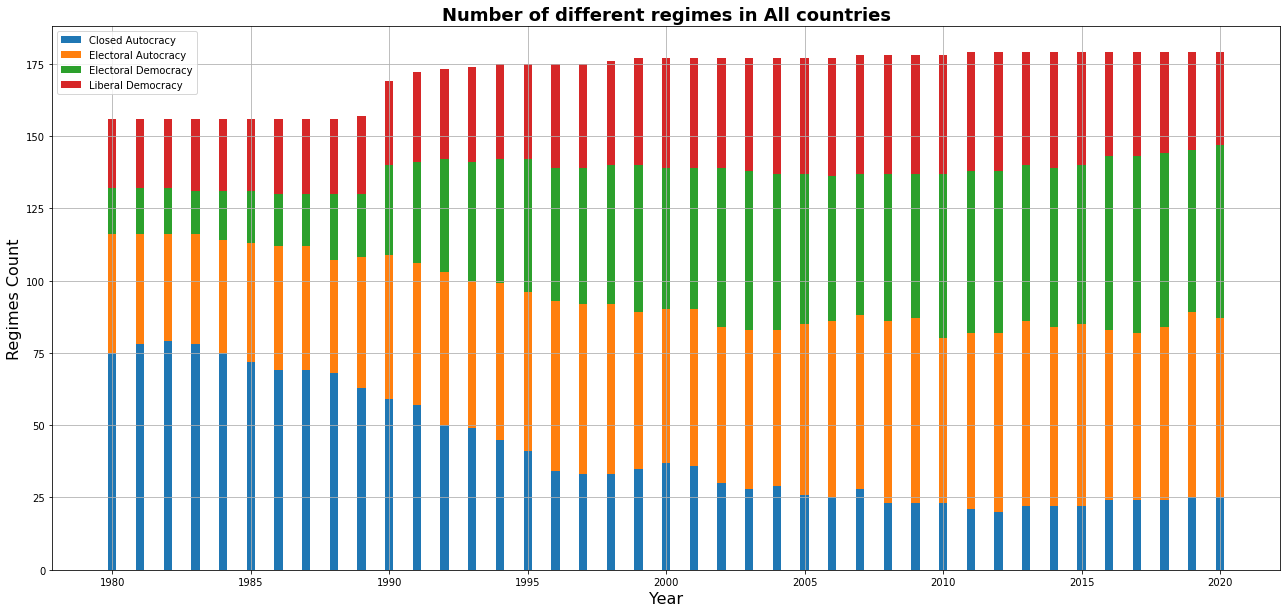

In [11]:
p0=vdem[(vdem.year >= 1980) & (vdem.v2x_regime == 0)][['year','v2x_regime']].groupby(['year']).count()['v2x_regime']
p1=vdem[(vdem.year >= 1980) & (vdem.v2x_regime == 1)][['year','v2x_regime']].groupby(['year']).count()['v2x_regime']
p2=vdem[(vdem.year >= 1980) & (vdem.v2x_regime == 2)][['year','v2x_regime']].groupby(['year']).count()['v2x_regime']
p3=vdem[(vdem.year >= 1980) & (vdem.v2x_regime == 3)][['year','v2x_regime']].groupby(['year']).count()['v2x_regime']
year = np.arange(1980, 2021, 1) #creates an array of years from 1980 to 2020, 2021 not included. 
#1980 - start, 2021 - the last (not included), 1 - steps of 1.

# In p0, we first filter for year 1980 and beyond, and then for regime = 0 (closed autocracy).
#Grouping by year, we get all regime 0 for each year and finally count them. Eg - for 1995, we have 41 in 0 regime.
#or in 1980 we have approx 40 electoral autocracies (roughly 115 - 75) - The yellow bar
# We do the same for all 4 regimes

fig, ax = plt.subplots(figsize=(22,10))

width = 0.3       # the width of the bars

ax.bar(year, p0, width, label='Closed Autocracy')
ax.bar(year, p1, width, bottom=p0 , label='Electoral Autocracy')
ax.bar(year, p2, width, bottom = p0+p1 , label='Electoral Democracy')
ax.bar(year, p3, width, bottom = p0+p1+p2 , label='Liberal Democracy')

#the bottom function defines the starting point of the next bar.
#So p0+p1, for example, constitutes the starting point of p2. 

ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Regimes Count', fontsize=16)
ax.set_title('Number of different regimes in All countries',fontweight="bold", fontsize=18)
ax.grid(True)
ax.legend()

plt.show()

The above graph helps us visualise the distribution of various regimes in the world post 1980. Towards the end, we see how there's an increase of Electoral Democracy and Electoral Autocracy, and a marked decrease of Closed Autocracy. Liberal democracy has a small decrease but post 1995 remains more or less common.
The total number of countries increase in 1991, which is due to more countries' data being recorded as new countries formed after the dissolution of USSR in 1991.

In [12]:
[merged.groupby('country_name').agg({'year': ['count', 'min', 'max'], 'v2x_polyarchy' : 'mean', 'Value' : 'mean' })]
#This is the same code for the merged dataset. Here we also additionally add the mean value of public welfare spending

[                          year             v2x_polyarchy      Value
                          count   min   max          mean       mean
 country_name                                                       
 Australia                   38  1980  2017      0.881868  15.309553
 Austria                     40  1980  2019      0.864425  25.972594
 Belgium                     40  1980  2019      0.876675  26.081625
 Canada                      39  1980  2018      0.834051  16.919462
 Chile                       33  1987  2019      0.796121  10.397758
 Colombia                    38  1980  2018      0.550632  13.325667
 Costa Rica                  28  1991  2018      0.902786   8.123167
 Czech Republic              30  1990  2019      0.871767  17.835533
 Denmark                     40  1980  2019      0.908325  24.760150
 Estonia                     27  1993  2019      0.878778  15.309571
 Finland                     40  1980  2019      0.869775  25.330875
 France                      40  1

The above code groups countries, and we can see the start year of the data of countries, and last year of data recorded. We also see the mean of the electoral democracy index, which gives us an idea of the democratic score of the countries throughout the years. 
On a first glance, this also helps us compare the two datasets, and we see a major difference in their mean polyarchy score. 
This is because SOCX has data mostly from OECD countries, and most of them have historically been democratic. \
**To interpret the variable Value, we take the example of Sweden. From 1980 to 2019, for the available data points (which is all the data points, since the count = 40), the average Public Social Spending as percentage of GDP is 27.15%.**

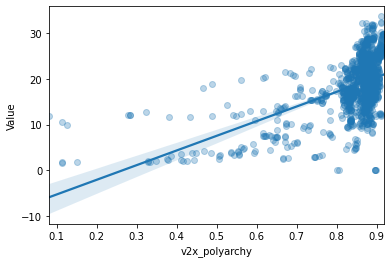

In [13]:
plot2 = sns.regplot(x="v2x_polyarchy", y="Value", scatter_kws={'alpha':0.3}, ci = 95, data=merged);
#creates a regression plot
#scatter_kws={'alpha':0.3} makes the data points more transparent
#ci = 95 places the confidence interval of 95% which is the shaded area

The graph shows the scatter plot of our datapoints and a regression line between the democracy index and social welfare spending. The shaded area is the confidence interval of the regression.
The graph clearly shows how most of our merged datapoints are clustered towards the right, with high polyarchy score. This is due to the overrepresentation of OECD countries in the dataset.

#### 4.2 Control Variables -

Our main control variables are as follows - 

1. GDP per capita 
2. GDP growth
3. Globalisation (measured by Openness Index)
4. Corruption 

##### 1. GDP Per Capita ln (e_migdppcln)
GDP per capita is an important control variable mentioned in the literature. It captures the countries' economic differences. More well-off countries are generally spend more money on their citizens. Note, we are taking the natural log transformation of GDP per capita, because growth in GDP has an exponential effect. 

In [14]:
merged['country_name'].unique()
#List of countries in our dataset

array(['Mexico', 'Sweden', 'Switzerland', 'Japan', 'Colombia', 'Poland',
       'United States of America', 'Portugal', 'South Korea', 'Canada',
       'Australia', 'Chile', 'Costa Rica', 'France', 'Germany', 'Ireland',
       'Italy', 'Latvia', 'Netherlands', 'Spain', 'Turkey',
       'United Kingdom', 'Austria', 'Belgium', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'Greece', 'Iceland', 'Israel',
       'Lithuania', 'Luxembourg', 'New Zealand', 'Norway', 'Slovakia',
       'Slovenia', 'Hungary'], dtype=object)

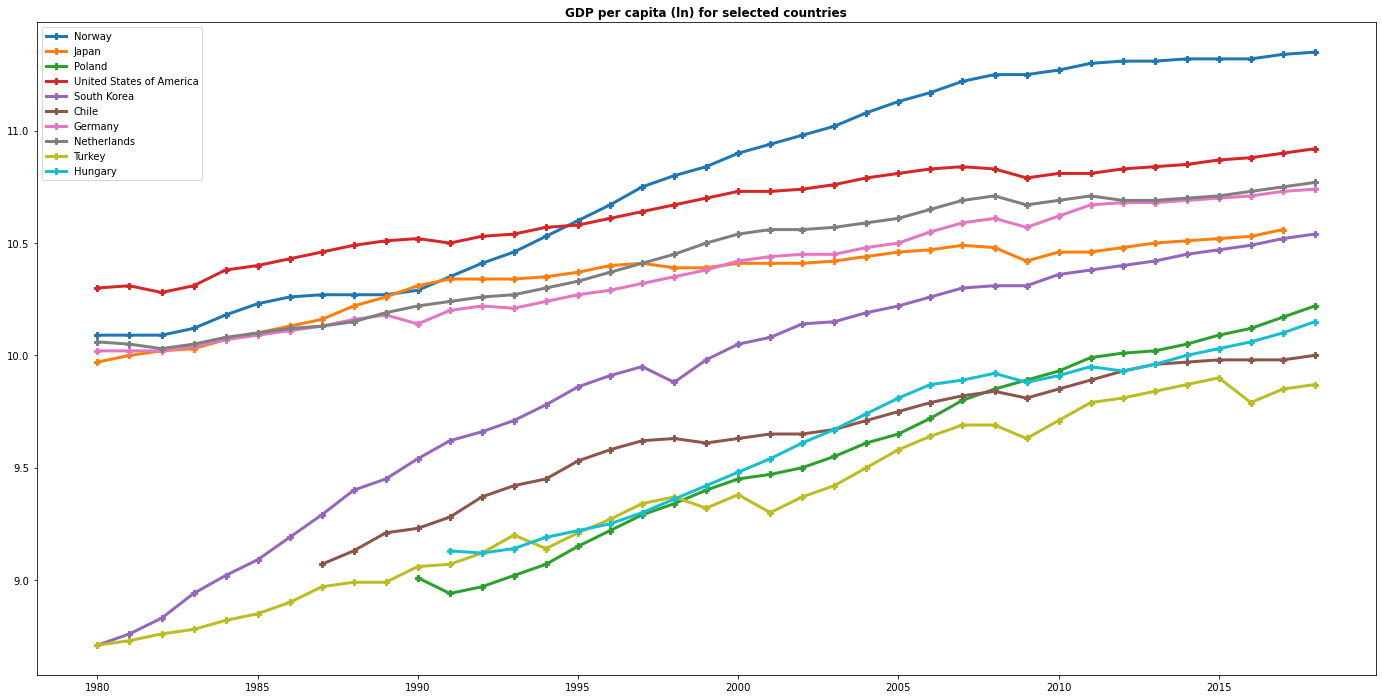

In [15]:
fig3, ax = plt.subplots(figsize=(24,12))
ax.set_title('GDP per capita (ln) for selected countries',fontweight="bold")

country = ['Norway', 'Japan', 'Poland', 'United States of America',
           'South Korea', 'Chile', 'Germany', 'Netherlands', 'Turkey', 'Hungary']
#Taking a random list of countries. If you want, you can pick any country from the above list and add it to the list to visualize!

# Making a for loop.
#What this does is taking each element in country dataset and then replacing i in the code below.
#This will create a line plot for each country

for i in country:
    plt.plot(merged[(merged.country_name == i)]['year'],merged[(merged.country_name == i)]['e_migdppcln'], label = i, marker = 'P', linewidth=3.0)

#in this line, we first select a country, and then select the years of that country as x, then for y we do the same for gdp per capita
#the label also changes with i. The marker is a big Plus sign, and linewidth to thicken the line.

plt.legend()
plt.show()


##### 2. Economic Growth (e_migdpgro)
Economic growth or GDP growth can be seen mentioned several times in Social Welfare literature. One of the key reasons for its presence is the common consensus on how growth helps alleviate poverty and even reduce inequality. It is also claimed that a focus on economic growth in early (or even late) stages of development could shift the attention from public welfare spending. Therefore, this makes economic growth a necessary control variable.

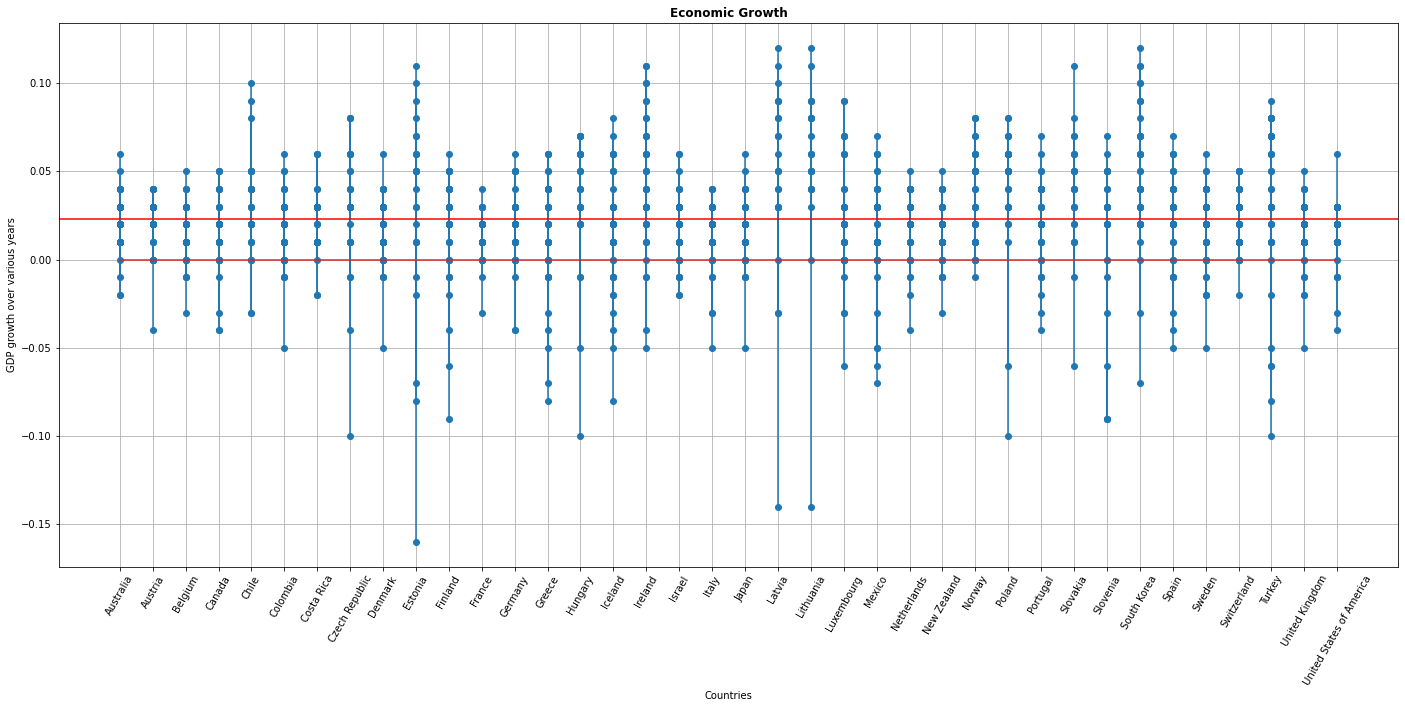

In [16]:
#Economic Growth - e_migdpgro
fig4, ax = plt.subplots(figsize=(24,10))
ax.set_title('Economic Growth',fontweight="bold")

#Economic growth of countries for all the years in the dataset

ax.stem(merged.sort_values('country_name')['country_name'],merged.sort_values('country_name')['e_migdpgro'])
       #sorting by country name and plotting values of gdpgrowth
plt.axhline(y = merged['e_migdpgro'].mean(),color='r', label='average gdp growth')
       #creates a horizontal line that is the average gdp growth
ax.set_xlabel('Countries')
ax.set_ylabel('GDP growth over various years')
ax.xaxis.set_tick_params(rotation=60) #rotates the xlabels to fit more

plt.grid()
plt.show()

This graph not only shows the range and variance of Economic Growth for different countries, but also shows that it fluctuates a lot. The average growth in the OECD countries is close to 2.5% in the dataset that we have. (Note- the scale is in decimals, so we have to multiply it with 100 to get percentage points)

##### 3. Openness Index (oi)
Globalisation and trade seem to be important for social welfare spending. Theory suggests that globalisation and exchange of ideas can lead to more social welfare demand by citizens, and consequently its supply through institutions. 
For this purpose, we are creating an [opennness index](https://eucham.eu/2015-11-trade-openness-index/#:~:text=The%20Openness%20Index%20is%20calculated,the%20country%20(OECD%20iLibrary).), which is a common measure for globalisation.

Openness Index can be described as Sum of Imports and Exports divided by GDP. To get the openness index, we do the following steps -
1. Multiply GDP per capita (e_migdppc) with Population (e_wb_pop) to get GDP
2. Add Exports (e_cow_exports) and Imports (e_cow_imports) to get trade
3. Divide trade by GDP to get Openness Index

$ openness = \frac{e\_cow\_exports \ + \ e\_cow\_imports}{e\_migdppc \ *\ e\_wb\_pop} $

In [17]:
merged['openness'] = (merged['e_cow_exports'] + merged['e_cow_imports'])/(merged['e_migdppc']*(merged['e_wb_pop']*0.00000001))
#Multiplying population with 0.00000001 to make the population unit in 100 millions. In the oi formula, population is taken in 100 millions
#This multiplication does not affect the distribution of values, just changes scale

In [18]:
merged = merged[merged['openness']<400]
# This is done to remove the outliers (We had one outlier - Luxemborg, which because of its small size and huge gdp was skewing the dataset)
merged[['e_wb_pop', 'country_name', 'year', 'openness']].dropna()
#dropna to drop NaN values (no values)

,e_wb_pop,country_name,year,openness
0,67761372.0,Mexico,1980,5.204810
1,69407624.0,Mexico,1981,5.948490
2,71058654.0,Mexico,1982,4.986060
3,72709299.0,Mexico,1983,4.462833
4,74352631.0,Mexico,1984,4.916887
...,...,...,...,...
1385,10000023.0,Hungary,2010,90.580818
1386,9971727.0,Hungary,2011,101.048725
1387,9920362.0,Hungary,2012,94.722937
1388,9893082.0,Hungary,2013,97.045430


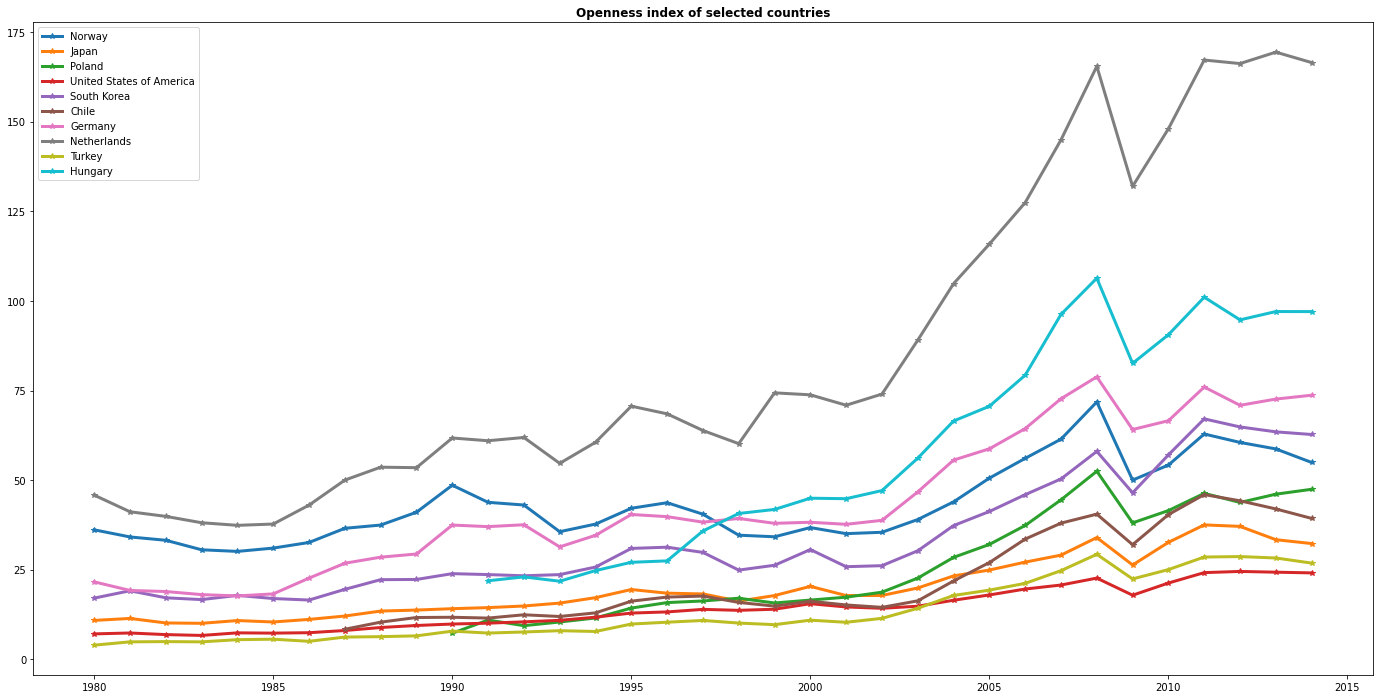

In [19]:
fig4, ax = plt.subplots(figsize=(24,12))
ax.set_title('Openness index of selected countries',fontweight="bold")

country = ['Norway', 'Japan', 'Poland', 'United States of America',
           'South Korea', 'Chile', 'Germany', 'Netherlands', 'Turkey', 'Hungary']
#Taking a random list of countries. If you want, you can add or delete any country from the above list to this list to visualize!

# Making a for loop similar to the previous graph
#This takes each element in country dataset and then replaces i in the code below.
#This will create a line plot for each country

for i in country:
    plt.plot(merged[(merged.country_name == i)]['year'],merged[(merged.country_name == i)]['openness'], label = i, marker = '*', linewidth=3.0)

#in this line, we first select a country, and then select the years of that country as x, then for y we do the same for openness index
#the label also changes with i. The marker is a star, and linewidth to thicken the line.

plt.legend()
plt.show()


We can see a similar trend in most of the countries, especially a dip around 2008, which could be due to a fall in trade after the 2008 financial crisis.
This index, as we can see, is slightly misleading. The bigger countries have lower values despite high trade due to high GDP. E.g., USA

##### 4. Corruption Perception Index (e_ti_cpi)
Corruption leads to wastage of public resources, but in political regimes, it is also used as a tool to skew power among groups. This allows politicians to operate using only the funds of a few rich patrons instead of the support from masses. For such reasons, literature considers corruption as a key control variable. **In this dataset, *low* values means more corruption. High values means more trust in institutions**

In [20]:
mergedw= merged[['country_name', 'year', 'v2x_polyarchy', 'e_ti_cpi']].dropna()
[mergedw.groupby('country_name').agg({'year': ['count', 'min', 'max'], 'v2x_polyarchy' : 'mean', 'e_ti_cpi' : 'mean' })]

#As we can see from this data, the data available for corruption index is very limited. It is only available for 2012, 2013 and 2014 in our dataset

[                          year             v2x_polyarchy   e_ti_cpi
                          count   min   max          mean       mean
 country_name                                                       
 Australia                    3  2012  2014      0.880667  82.000000
 Austria                      3  2012  2014      0.875000  70.000000
 Belgium                      3  2012  2014      0.893000  75.333333
 Canada                       3  2012  2014      0.814333  82.000000
 Chile                        3  2012  2014      0.889667  72.000000
 Colombia                     3  2012  2014      0.660333  36.333333
 Costa Rica                   3  2012  2014      0.910667  53.666667
 Czech Republic               3  2012  2014      0.868000  49.333333
 Denmark                      3  2012  2014      0.916000  91.000000
 Estonia                      3  2012  2014      0.878667  67.000000
 Finland                      3  2012  2014      0.892667  89.333333
 France                       3  2

In [21]:
#We are making a new dataset where we groupby countries to create an avergage corruption index for the datapoints available
mergedcpi = merged.groupby('country_name').agg({'e_ti_cpi' : 'mean'}).dropna()
print(mergedcpi.columns)

Index(['e_ti_cpi'], dtype='object')


In [22]:
#As we can see, when we did the groupby, the country_name got turned into index, so using this code we make it into a column
mergedcpi['country_name'] = mergedcpi.index
mergedcpi.head()

,e_ti_cpi,country_name
country_name,,
Australia,82.000000,Australia
Austria,70.000000,Austria
Belgium,75.333333,Belgium
Canada,82.000000,Canada
Chile,72.000000,Chile


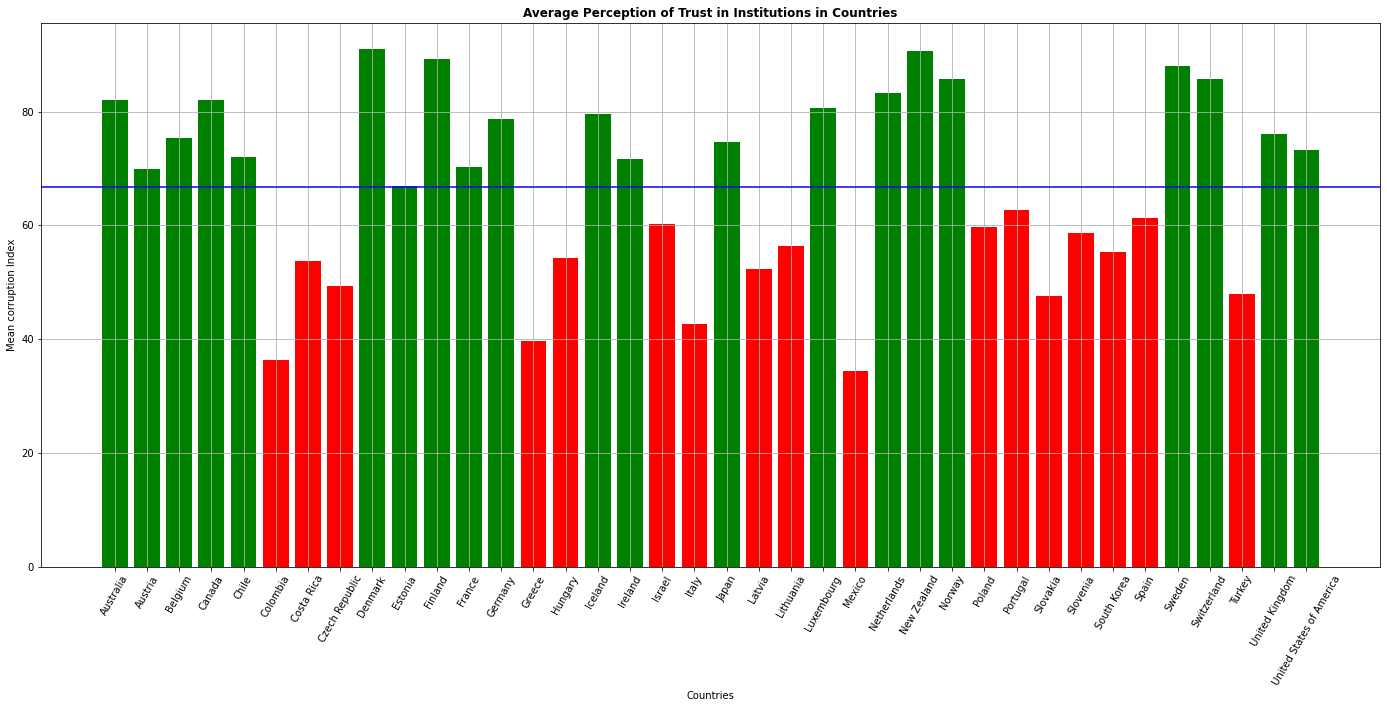

In [23]:
# Corruption Index (e_ti_cpi)
fig5, ax = plt.subplots(figsize=(24,10))
ax.set_title('Average Perception of Trust in Institutions in Countries',fontweight="bold")

#Trust levels in countries for various years in the dataset

colormat=np.where(mergedcpi['e_ti_cpi']>mergedcpi['e_ti_cpi'].mean(), 'g','r')
#np.where return elements chosen from x or y depending on condition. Here the condition is if trust more than mean, then green, or else red
ax.bar(mergedcpi['country_name'],mergedcpi['e_ti_cpi'], color = colormat)
       #plotting values of corruption index and telling the color to obey the condition
plt.axhline(y = mergedcpi['e_ti_cpi'].mean(),color='b', label='Average Corruption Index across the database')
       #creates a horizontal line that is the average Corruption Index across the database
ax.set_xlabel('Countries')
ax.set_ylabel('Mean corruption Index')
ax.xaxis.set_tick_params(rotation=60) #rotates the xlabels to fit more

plt.grid()
plt.show()

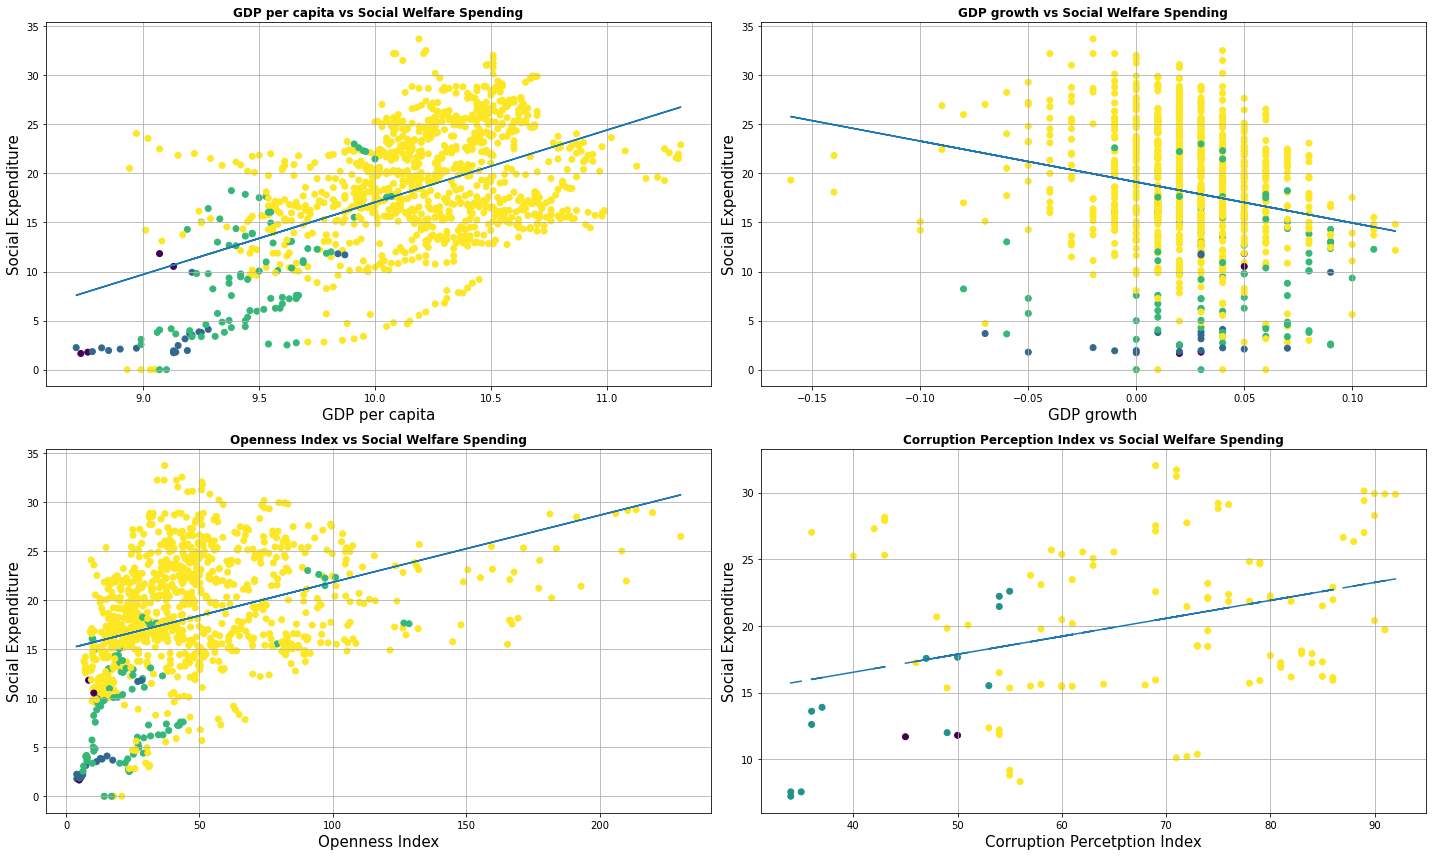

In [24]:
# Making a matplotlib plot which has 4 subplot using a 2 by 2 grid - 

fig7, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))
ax.set_title('Control Variables')

#Running 4 OLS for each variable to plot a regression line -

olsa = smf.ols(formula='Value ~ e_migdppcln', data=merged).fit()
olsb = smf.ols(formula='Value ~ e_migdpgro', data=merged).fit()
olsc = smf.ols(formula='Value ~ openness', data=merged).fit()
olsd = smf.ols(formula='Value ~ e_ti_cpi', data=merged).fit()


# Plotting GDP per capita (e_migdppcln) vs Social Welfare Spending (Value)

ax1.set_title('GDP per capita vs Social Welfare Spending',fontweight="bold")
ax1.scatter([merged['e_migdppcln']], [merged['Value']], c=[merged['v2x_regime']])
ax1.set_xlabel('GDP per capita', fontsize=15)
ax1.set_ylabel('Social Expenditure', fontsize=15)
ax1.plot(merged['e_migdppcln'], olsa.params[1]*merged['e_migdppcln'] + olsa.params[0])
ax1.grid(True)

#olsa.params[1] refers to the beta coffecient, and param[0] to the intercept

# Plotting GDP Growth (e_migdpgro) vs Social Welfare Spending (Value) 

ax2.set_title('GDP growth vs Social Welfare Spending',fontweight="bold")
ax2.scatter([merged['e_migdpgro']], [merged['Value']], c=[merged['v2x_regime']])
ax2.set_xlabel('GDP growth', fontsize=15)
ax2.set_ylabel('Social Expenditure', fontsize=15)
ax2.plot(merged['e_migdpgro'], olsb.params[1]*merged['e_migdpgro'] + olsb.params[0])
ax2.grid(True)

# Plotting Openness Index (oi) vs Social Welfare Spending (Value)

ax3.set_title('Openness Index vs Social Welfare Spending',fontweight="bold")
ax3.scatter([merged['openness']], [merged['Value']], c=[merged['v2x_regime']])
ax3.set_xlabel('Openness Index', fontsize=15)
ax3.set_ylabel('Social Expenditure', fontsize=15)
ax3.plot(merged['openness'], olsc.params[1]*merged['openness'] + olsc.params[0])
ax3.grid(True)

# Plotting Corruption Perception Index (e_ti_cpi) vs Social Welfare Spending (Value)

ax4.set_title('Corruption Perception Index vs Social Welfare Spending',fontweight="bold")
ax4.scatter([merged['e_ti_cpi']], [merged['Value']], c=[merged['v2x_regime']])
ax4.set_xlabel('Corruption Percetption Index', fontsize=15)
ax4.set_ylabel('Social Expenditure', fontsize=15)
ax4.plot(merged['e_ti_cpi'], olsd.params[1]*merged['e_ti_cpi'] + olsd.params[0])
ax4.grid(True)


fig7.tight_layout()

plt.show()

We see a positive correlation between GDP per capita and Social Welfare spending, Openness Index and Social Welfare spending, whereas there exists a negative correlation between GDP growth and Social Welfare spending. We also see a positive relation between trust and social welfare spending.

### 5. Data Analysis

We are now finally onto data analysis now that we have gotten a good idea of how our data looks like. For our analysis, we would be using OLS regression, from the package statsmodel. Since we have multiple sources and units, we will run a regression for each of them, and then interpret the results.

Before we start with our regression, since we have multiple independent variables, we should check for multicollinearity.

#### 5.1 Checking for Multicollinearity

In [25]:
# Create an empty dataframe for VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
X= merged[['Value', 'e_migdppcln','v2x_polyarchy', 'e_ti_cpi' , 
            'openness' , 'e_migdpgro']].dropna()
#selecting covariates and making a Dataframe out of it
vif_data["feature"] = X.columns
  
# calculating VIF for each feature using a for loop
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

#For VIF > 5, you have high multicollinearity

,feature,VIF
0,Value,22.097811
1,e_migdppcln,126.443840
2,v2x_polyarchy,151.617498
3,e_ti_cpi,27.410597
4,openness,4.821619
5,e_migdpgro,1.723973


We see that there exists high multicollinearity between all variables except oi and e_migdpgro. Multicollinearity means our coefficient estimates are very sensitive to small changes in independent variable and weakens statisitcal power. \
But if high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems. In our case, it exists for both. Therefore one potential solution is to drop variables to reduce multicollinearity, but that reduces meaning from the regression, so we keep these variables. We will run a regression without controls to compare as well.
Note - This means our regression results would have less precise measurements, but can still indicate us about the direction.

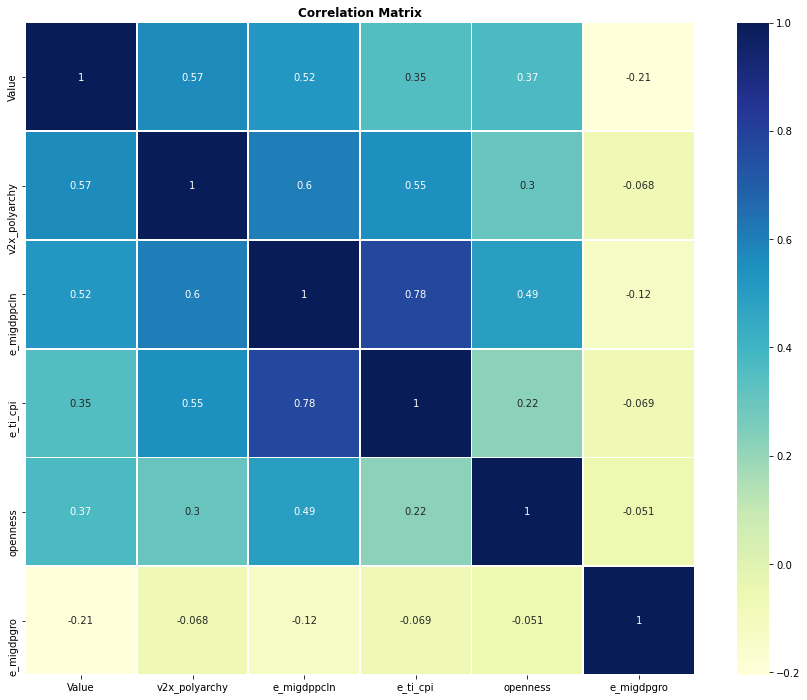

In [26]:
# Construction a correlation Heatmap
corrMatrix = merged[['Value' ,'v2x_polyarchy', 'e_migdppcln' , 'e_ti_cpi' , 
                    'openness' , 'e_migdpgro']].corr()
#makes a correlation matrix using the relevant variables

fig8, ax = plt.subplots(figsize=(15,12))
ax.set_title('Correlation Matrix',fontweight="bold")
sns.heatmap(corrMatrix, annot=True, linewidths=0.75,cmap="YlGnBu");
#sns.heatmap plots a correlation heatmap
# the ; at the end removes the output line code we don't need.
#annot shows the corrleation value
#line width just to have some space between squares
#cmap to choose a different colour scheme

Here, each square represents the correlation between the two variables, and the middle line is 1 because they are always perfectly correlated with themselves. The darker the colour, the higher the correlation. For example, corruption is highly correlated with gdp per capita. But this could also be because we have few data points for corruption index as it recently started getting measured.

#### 5.2 Running Regressions -

In [27]:
#Regression 1 - Without controls
ols1 = smf.ols(formula='Value ~ v2x_polyarchy', data=merged).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     506.8
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           3.09e-92
Time:                        19:43:44   Log-Likelihood:                -3307.9
No. Observations:                1076   AIC:                             6620.
Df Residuals:                    1074   BIC:                             6630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.3922      1.322     -8.619

Here we run a regression with Value and democracy index. The p values are significant and our confidence interval does not include 0. This can be seen in the plot below as well. The R square says that the independent variable explains 32% of the variation in dependent variable. To interpret the results, we look at the equation of this regression. -

$ Value_{i,t} = \beta_0 + \beta_1 v2x\_polyarchy_{i,t} + \epsilon_{i,t} $

Here the $\beta_0$ or the intercept is -11.3922 and $\beta_1$ is 35.1115. This would mean for every unit change in X, Y changes by 35 units (%). But for our situation, since the Y (Value) is in percent, and X (v2x_polyarchy) ranges from 0 to 1, it would be more appropriate to say that if v2x_polyarchy changes from 0 to 1, the public social spending would increase by 35 percentage points. That is to say that for every 0.1 increase in democracy index, the public welfare spending goes up by 3.5% on average.
This is a significant effect.

Just a small interpretation of the variables at the end, although they're not very important for our analysis.

The omnibus test tells us the normalcy when it is equal to 0. Significant value of omnibus means our data is not normally distributed. 

Condition number tells us if our data is under the risk of multicollinearity. A good reference point is having the number under 30. The number of this analysis 16.7.

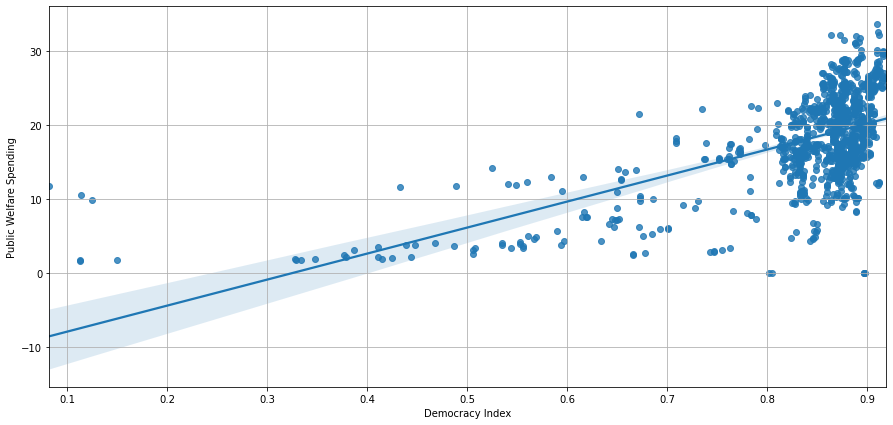

In [28]:
#Plotting the regression using seaborn

# create the figure and axes
fig9, ax = plt.subplots(figsize=(15, 7))

# add the plot
sns.regplot(y='Value', x='v2x_polyarchy', data=merged)
ax.set(ylabel='Public Welfare Spending', xlabel='Democracy Index')

ax.grid(True)
plt.show()

#We have plotted this before, but placing it here again just for comparison
#We are unable to plot the other regressions with control variables because it makes the the dataset multiaxes

In [29]:
#Regression 2 - With covariates
#Now doing OLS with all the control variables
ols1wc = smf.ols(formula='Value ~ v2x_polyarchy+ e_migdppcln + e_ti_cpi + openness + e_migdpgro', 
               data=merged).fit()
#taking GDP per capita in log because it is exponential in nature
print(ols1wc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     19.17
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.30e-13
Time:                        19:43:44   Log-Likelihood:                -331.27
No. Observations:                 114   AIC:                             674.5
Df Residuals:                     108   BIC:                             691.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -25.4691     15.840     -1.608

Regression equation - $ Value_{i,t} = \beta_0 + \beta_1 v2x\_polyarchy_{i,t} + \beta_2 e\_ migdppcln_{i,t} + \beta_3 e\_ ti\_ cpi_{i,t} + \beta_4 openness_{i,t} + \beta_5 e\_ migdpgro_{i,t} + \epsilon_{i,t} $

The results for our main independent variable are still statistically significant, and shows an increase of 2.2% percentage points for a 0.1 increase in democracy index. Here, except gdp growth, no other control variables are statistically signficant. With the controls, the independent variables now explain 47% of the variation in the dependent variable.

In [30]:
#Regression 3 - With covariates but not corruption index
#Now doing OLS with all the control variables except the corruption index
#Main results -

ols2wc = smf.ols(formula='Value ~ v2x_polyarchy + e_migdppcln  + openness + e_migdpgro', 
               data=merged).fit()
print(ols2wc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 30 Jan 2022   Prob (F-statistic):          5.61e-128
Time:                        19:43:44   Log-Likelihood:                -3216.0
No. Observations:                1076   AIC:                             6442.
Df Residuals:                    1071   BIC:                             6467.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -32.3289      3.750     -8.621

Regression equation - $ Value_{i,t} = \beta_0 + \beta_1 v2x\_polyarchy_{i,t} + \beta_2 e\_ migdppcln_{i,t} + \beta_3 openness_{i,t} + \beta_4 e\_ migdpgro_{i,t} + \epsilon_{i,t} $

Interpretation - The corruption index is removed, because the data available to us on corruption index is very limited - only on 3 years. This can cause significant bias in our analyses. Removing the corruption index, we can see that all of our variables are now statistically significant. It also gets our data closer to normalcy and significantly reduces multicollinearity, as evidenced by the condition number, although that is still an issue. \
Our independent variable, v2x_polyarchy is still significant, but the effect has remained more of less same. A unit change in v2x_polyarchy now leads to a 25% increase. In other words, a 0.1 change in the index leads to a 2.5% percentage points increase in public welfare spending, which is still a significantly large effect. 

## VII. Sensitivity Analysis

For the senstitivity analysis, we are using the polity V database, which is frequently used in Economic Literature, to see if our results with vdem are similar to what polity V results would be.

The different functional forms that we assumed are logarithmic form for gdp per capita. We will print results here to show how using the log scale helps us predict better.

In [31]:
#Regression 3 - With covariates but not corruption index
#Now doing OLS with all the control variables except the corruption index

ols1sa = smf.ols(formula='Value ~ v2x_polyarchy + e_migdppc + openness + e_migdpgro', 
               data=merged).fit()
#We are NOT taking log of gdp per capita this time
print(ols1sa.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 30 Jan 2022   Prob (F-statistic):          7.69e-123
Time:                        19:43:44   Log-Likelihood:                -3227.9
No. Observations:                1076   AIC:                             6466.
Df Residuals:                    1071   BIC:                             6491.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.4527      1.254     -6.739

The results are quite similar to our results with gdp per capita with ln. It now says that a 0.1 increase in democracy index leads to a 2.8% increase in public welfare spending. Therefore, it would be sufficient if we performed the regression either way. Although since the gdp exponentially increases over years, ln seems to be a more suitable choice.

For our senstivity analysis, we are going to use Polity V dataset, which is another democracy index, to see how the change in democracy index affects our results.

In [32]:
ols2sa = smf.ols(formula='Value ~ e_p_polity + e_migdppcln + openness + e_migdpgro', 
               data=merged).fit()
#We are taking log of population because population growth is exponential
print(ols2sa.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 30 Jan 2022   Prob (F-statistic):          4.70e-116
Time:                        19:43:44   Log-Likelihood:                -3171.2
No. Observations:                1051   AIC:                             6352.
Df Residuals:                    1046   BIC:                             6377.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -32.3109      3.931     -8.220      

Here, the results are still significant, and a unit change in polity index changes the public welfare spending by 1.19 percentage points. But the polity index ranges from -10 to +10. A rough comparision can be made where a unit change in polity index reflects a 0.5 change in v2x_polyarchy. Therefore we can say a unit change in v2x_polyarchy should be, very crudely putting, be equal to a 2 points change in polity index. \
A 2 point change in polity index would thus lead to a $2 * 1.19 = 2.38$, or a roughly 2.4 percentage point change in public social welfare spending, which is comparable to our result of 2.5% by v2x_polyarchy.

## VIII. Discussion and conclusion

#### 8.1 Key result -
The results suggest that democracy has a significant effect on public welfare. Here public welfare spending is spending towards social security, pension, etc. 

#### 8.2 In this part, I want to highlight a few key weaknesses about this project -
1. This project, like most emperical studies, has a lot of assumptions in place. Although linearity is a critical assumption, there is always a possibility of exponential effect, or non-linear relations that we did not cover in this project. Another assumption is the absence of lagged effect. Usually a change in political atmosphere has a delayed effect on policy due to the time it takes to get implemented, possibly a year or two later. So an unexplored possibility of lagged OLS exists.
2. Our dataset was limited to the OECD dataset, which is a group of highly democratic countries. We cannot fully apply these results to developing countries, and they need to be tested. Therefore a more comprehensive database is needed for it.
3. The control variables of this study were chosen from a limited literature review. As a result some variables lacked datapoints, while others had the issue of multicollinearity. More comprehensive datasets and study of literature could provide us with better control variables which could explain more of the effect. 
4. Time fixed effects or linear trends were not explored in this project.
5. Multicollinearity is an issue which is still present in the dataset. Future study can employ methods like LASSO regressions.

#### 8.3 Conclusion
Overall this project establishes a causal link between the democracy level of a country and its public welfare expenditure. 
This gives us a direction for further studies, and also makes a case for general public to have an institutional shift towards democracy. These results could be a starting point for an investigation into the political economic debates about public welfare, and there could be several interesting conclusion that can be derived if we work with the democracy index. These results also show how the VDem database is versatile, and although not used in economic literature, the political economic literature could benefit from using both VDem and Polity V database.

### IX. References -

1. Amenta, Edwin, “The state of the Art in Welfare State Research on Social Spending Efforts in Capitalist Democracies Since 1960,” American Journal of Sociology, Vol. 99, No. 3 (November 1993): 750-63
2. Noy, Shiri. “New Contexts, Different Patterns? A Comparative Analysis of Social Spending and Government Health Expenditure in Latin America and the OECD.” International Journal of Comparative Sociology 52, no. 3 (June 2011): 215–44. https://doi.org/10.1177/0020715211408760.
3. Lindauer, David L., and Ann D. Velenchik. "Government Spending in Developing Countries: Trends, Causes, and Consequences." The World Bank Research Observer 7, no. 1 (1992): 59-78. Accessed May 13, 2021. http://www.jstor.org/stable/3986300.
4. Lindert, Peter, “What Limits Social Spending?” Explorations of Economic History, Vol. 33 (1996): 1-34.
5. Peksen, Dursun and Zeynep Taydas, “Can states buy peace? Social welfare spending and civil conflicts,” Journal of Peace Research, vol. 49, no. 2: 273–287.
6. Potrafke, Niklas, “The growth of public health expenditures in OECD countries: Do government ideology and electoral motives matter?” Journal of Health Economics, Vol. 29 (2010): 797-810. 
7. Rudra, Nita, and Stephan Haggard. “Globalization, Democracy, and Effective Welfare Spending in the Developing World.” Comparative Political Studies 38, no. 9 (November 2005): 1015–49. https://doi.org/10.1177/0010414005279258.
8. Sergio Espuelas Barroso, 2016. "Political Regime and Social Spending in Spain: A Time Series Analysis (1850-2000)," UB Economics Working Papers 2016/355, Universitat de Barcelona, Facultat d'Economia i Empresa, UB School of Economics.

_____